# Data wrangling and EDA

Data taken from https://www.kaggle.com/alexanderfrosati/goodbooks-10k-updated?select=books.csv

In [1]:
# Import the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data 
books = pd.read_csv('../data/raw/books.csv')
ratings = pd.read_csv('../data/raw/ratings.csv')
tags = pd.read_csv('../data/raw/tags.csv')
book_tags = pd.read_csv('../data/raw/book_tags.csv')
to_read = pd.read_csv('../data/raw/to_read.csv')
# personal_library = pd.read_csv('../data/raw/personalLibrary.csv') # This is someone's personal library, just one user! 

Examine the head and tail, and get the shape, to get a feel for the book data.

In [3]:
ratings.sample(5)

,user_id,book_id,rating
2128454,28783,57,2
1582101,22491,595,5
5157234,52296,8738,4
3833023,44150,62,5
4252483,25630,4460,5


In [4]:
tags.sample(5)

,tag_id,tag_name
20205,20205,mistery
5367,5367,books-read-to-the-kids
25879,25879,richard-castle
22864,22864,packed-away-box-2
22137,22137,o-malley


In [5]:
book_tags.sample(5)

,goodreads_book_id,tag_id,count
646133,5024334,27951,11
979134,25430584,3379,23
281116,61672,7852,53
11242,1295,10197,48
560559,821000,33150,6


In [6]:
to_read.sample(5)

,user_id,book_id
151078,22078,231
477794,43789,1491
3243,3363,117
470588,14667,7944
282950,3673,2668


In [7]:
books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [8]:
books.tail(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...
9999,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9162,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...


In [9]:
books.shape

(10000, 23)

In [10]:
ratings.user_id.nunique()

53424

In [11]:
ratings.count()

user_id    5976479
book_id    5976479
rating     5976479
dtype: int64

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [11]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


Some years are negative in the original_publication_year column. Otherwise the values looks good. 

In [12]:
books[books['original_publication_year'] < 0].title.head(10)

78                                            The Odyssey
340                                             The Iliad
402                                        The Art of War
771                                          The Republic
823                   Oedipus Rex  (The Theban Plays, #1)
1098                                         Tao Te Ching
1119                                       Aesop's Fables
1279                                           The Aeneid
1520                      Antigone (The Theban Plays, #3)
2051    The Oedipus Cycle: Oedipus Rex/Oedipus at Colo...
Name: title, dtype: object

Negative values mean prior to 0 A.D. So not a surprise there! 

Right off the bat I notice that J.K. Rowling has the artist in the author category. Additionally, the publisher column has both Scholastic and Scholastic Inc. to mean the same thing. I am going to clean that up really quick. 

In [13]:
books.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

## Missing Data

We see some mising data in isbn, isbn13, original_publication_year, original_title, and language_code. I am going to examine each of these and see if there is any connection or correlation. 

<AxesSubplot:>

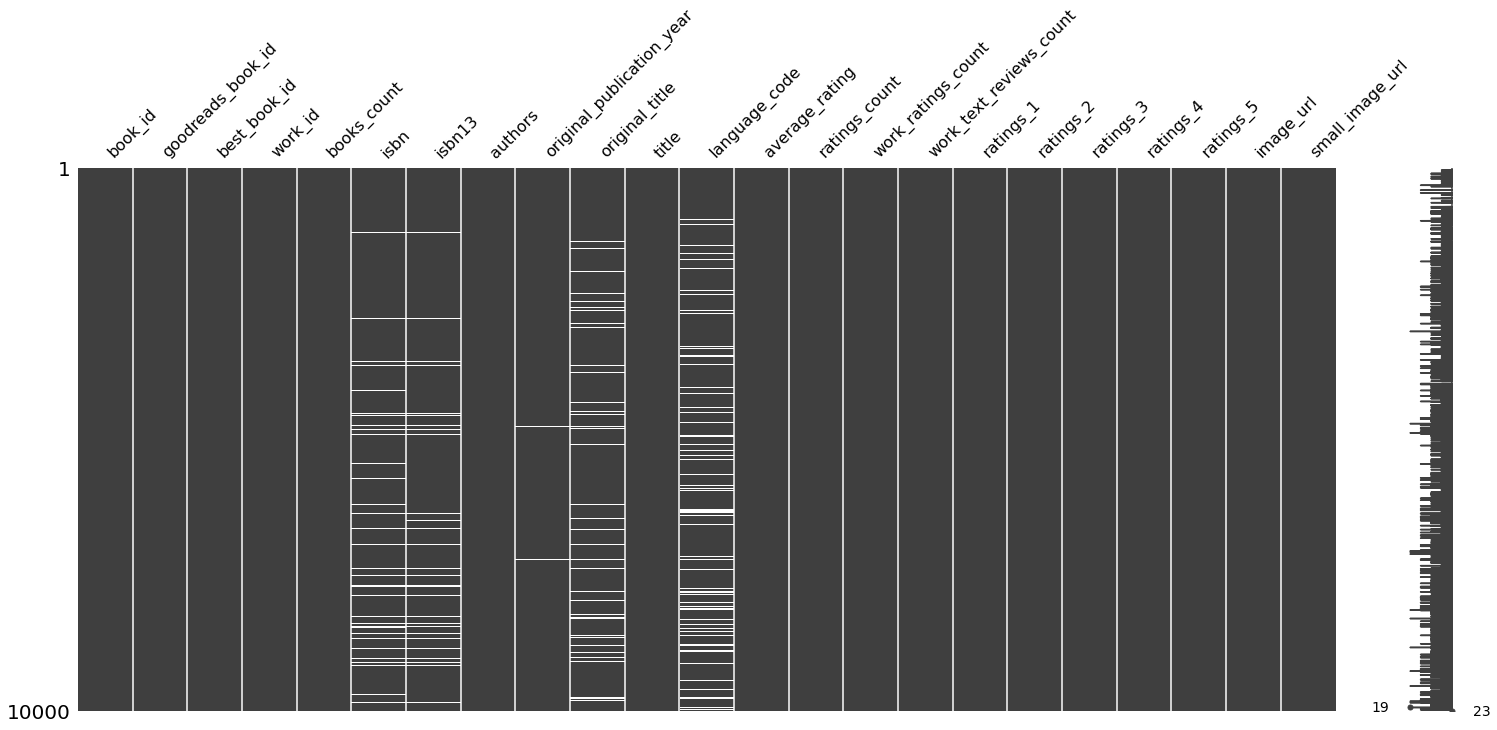

In [14]:
msno.matrix(books)

It does not appear to be missing at random. Much of the missing data is consistent among columns. Let's sort by isbn. 

<AxesSubplot:>

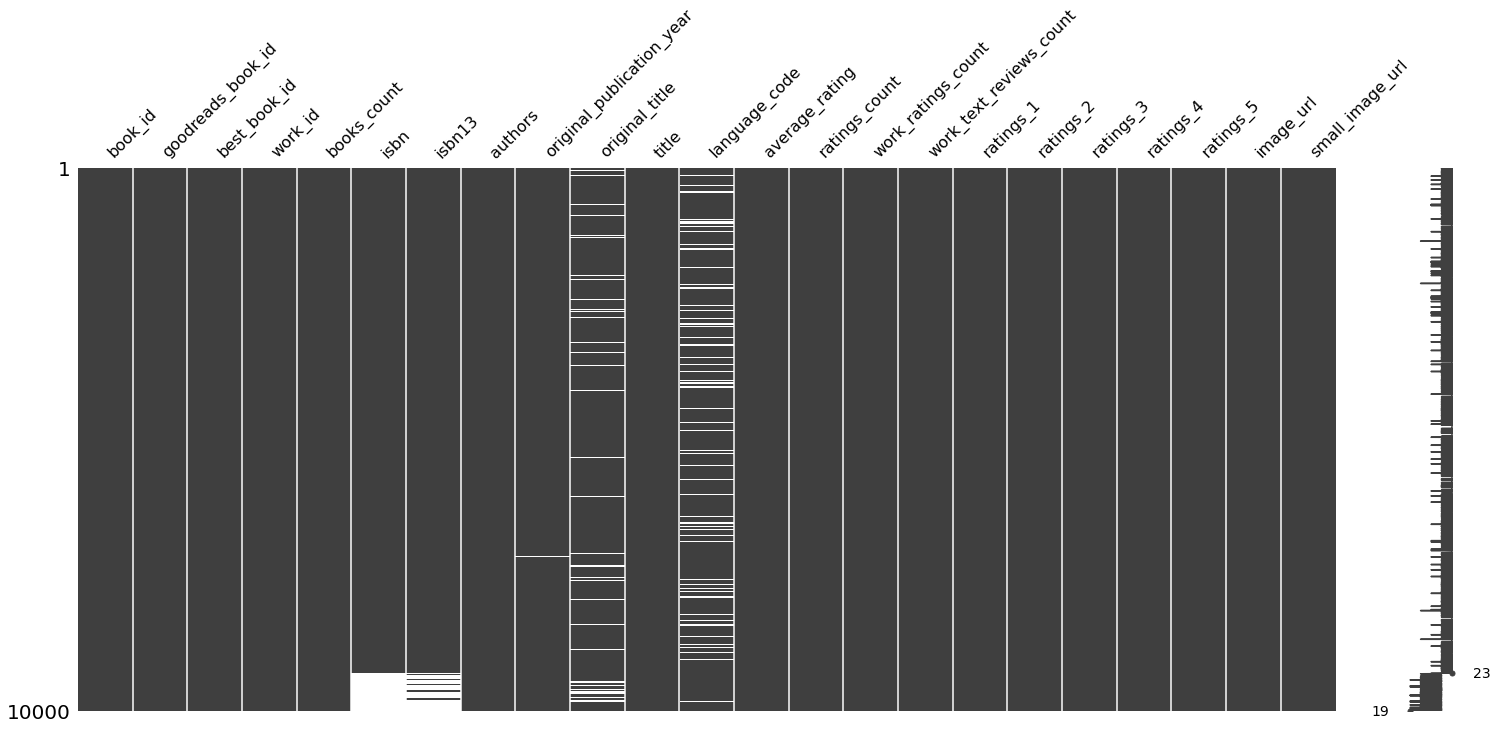

In [15]:
msno.matrix(books.sort_values('isbn'))

<AxesSubplot:>

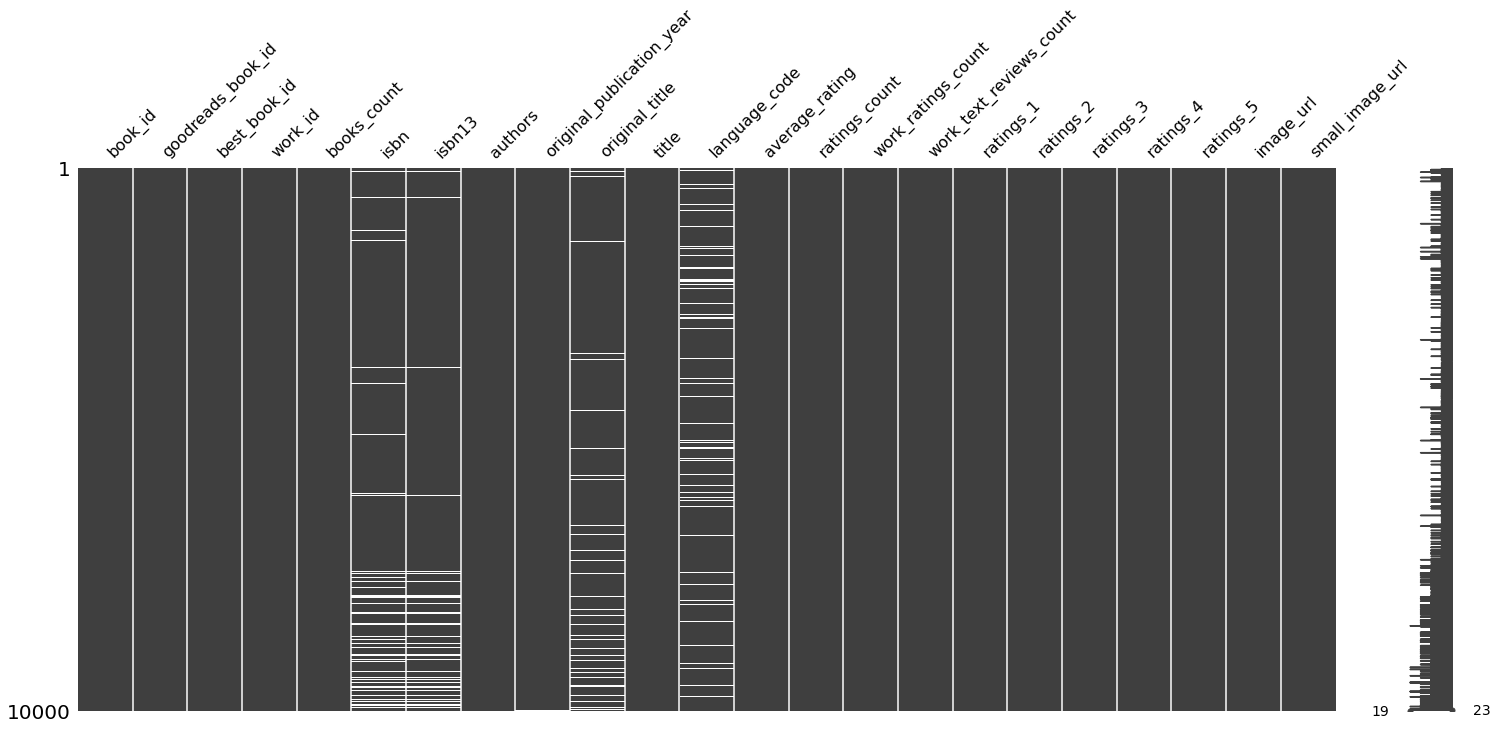

In [16]:
msno.matrix(books.sort_values('original_publication_year', ascending=True))

Some books are missing isbn but have isbn13, but not the other way around. The original title and langauge code are still missing in a seemingly semi-random order; more newer books are missing original titles than older books, and the older books are missing language code more often. 

### What books are published most? 

In [17]:
# Let's see what the books that are published the most times are
bk = books['title'].value_counts()
bk.head(10)

Selected Poems                               4
Stone Soup                                   3
The Beach House                              2
'Salem's Lot                                 2
Between the Lines (Between the Lines, #1)    2
One Flew Over the Cuckoo's Nest              2
The Witness                                  2
Arcadia                                      2
The Stranger                                 2
The Little Mermaid                           2
Name: title, dtype: int64

We can see some titles are repeated. Let's look and see what books are by the same author. 

In [18]:
books[books.title=='Selected Poems'].authors.unique()

array(['Emily Dickinson', 'William Carlos Williams, Charles Tomlinson',
       'George Gordon Byron, Peter J. Manning, Susan J. Wolfson',
       'E.E. Cummings, Richard S. Kennedy'], dtype=object)

In [19]:
books[books.title=="'Salem's Lot"].authors.unique()

array(['Stephen King', 'Stephen King, Jerry N. Uelsmann'], dtype=object)

In [20]:
books[books.title=='Stone Soup'].authors.unique()

array(['Marcia Brown',
       'Ann McGovern, Winslow Pinney Pels, Winslow Pinn, Ey Pels',
       'Jon J. Muth'], dtype=object)

These are mostly unique books, with one or two exceptions. I will leave this as it is. 

### What is the distribution of books for all languages?

In [21]:
# Let's see what the languages are most common 
lang_counts = books.groupby('language_code')['title'].count()
lang_counts.sort_values(ascending=False, inplace=True)
lang_counts.head()

language_code
eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
Name: title, dtype: int64

Text(0, 0.5, 'Number of titles in language')

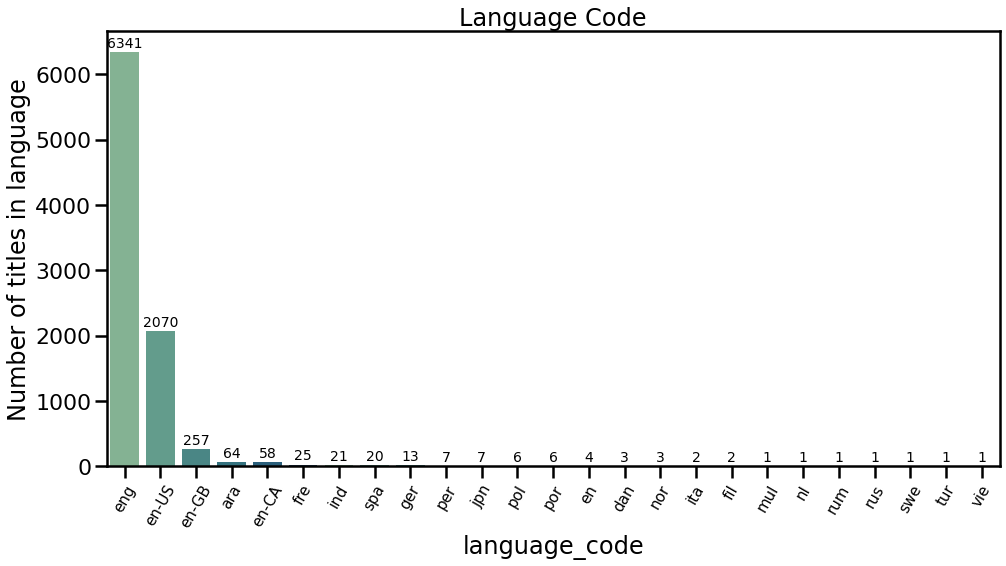

In [22]:
# Let's see what the languages are most common  in chart form
sns.set_context('poster')
plt.figure(figsize=(16,8))
plt.xticks(fontsize = 15, rotation = 60)
palette = sns.color_palette("crest")


lang_plot = sns.barplot(x=lang_counts.index, y=lang_counts, palette=palette)

for p in lang_plot.patches:
    lang_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    size = 14,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title('Language Code')
plt.xlabel("language_code")
plt.ylabel("Number of titles in language")

From the given graph, we can see that in the given data, most of the books are in english languages, with some further categorized into the region of English. The next most popular languages are Arabic and French. 

### Which are the top 10 most rated books?

In [23]:
# Let's see what the most rated books are, and the top rated books
ratings_count = books.sort_values('ratings_count', ascending = False).head(10)
ratings_count[['title','average_rating','ratings_count']].head(10)

,title,average_rating,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
2,"Twilight (Twilight, #1)",3.57,3866839
3,To Kill a Mockingbird,4.25,3198671
4,The Great Gatsby,3.89,2683664
5,The Fault in Our Stars,4.26,2346404
6,The Hobbit,4.25,2071616
7,The Catcher in the Rye,3.79,2044241
9,Pride and Prejudice,4.24,2035490
8,"Angels & Demons (Robert Langdon, #1)",3.85,2001311


In [24]:
ratings_avg = books.sort_values('average_rating', ascending = False).head(10)
ratings_avg[['title','average_rating','ratings_count']].head(10)

,title,average_rating,ratings_count
3627,The Complete Calvin and Hobbes,4.82,28900
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220
861,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,Mark of the Lion Trilogy,4.76,9081
7946,ESV Study Bible,4.76,8953
4482,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
3752,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
6919,The Indispensable Calvin and Hobbes,4.73,14597


Both of these are useful to know. The first in a series seems to be the most commonly rated, and the other books seem to be school readings or cultural phenomenoms. 

The best rated books are somewhat more surprising, but seeing multiples of the same in different forms is not too surprising.

Now I want to make a graph and see the number of ratings, as well as the average ratings for those most rated books. 

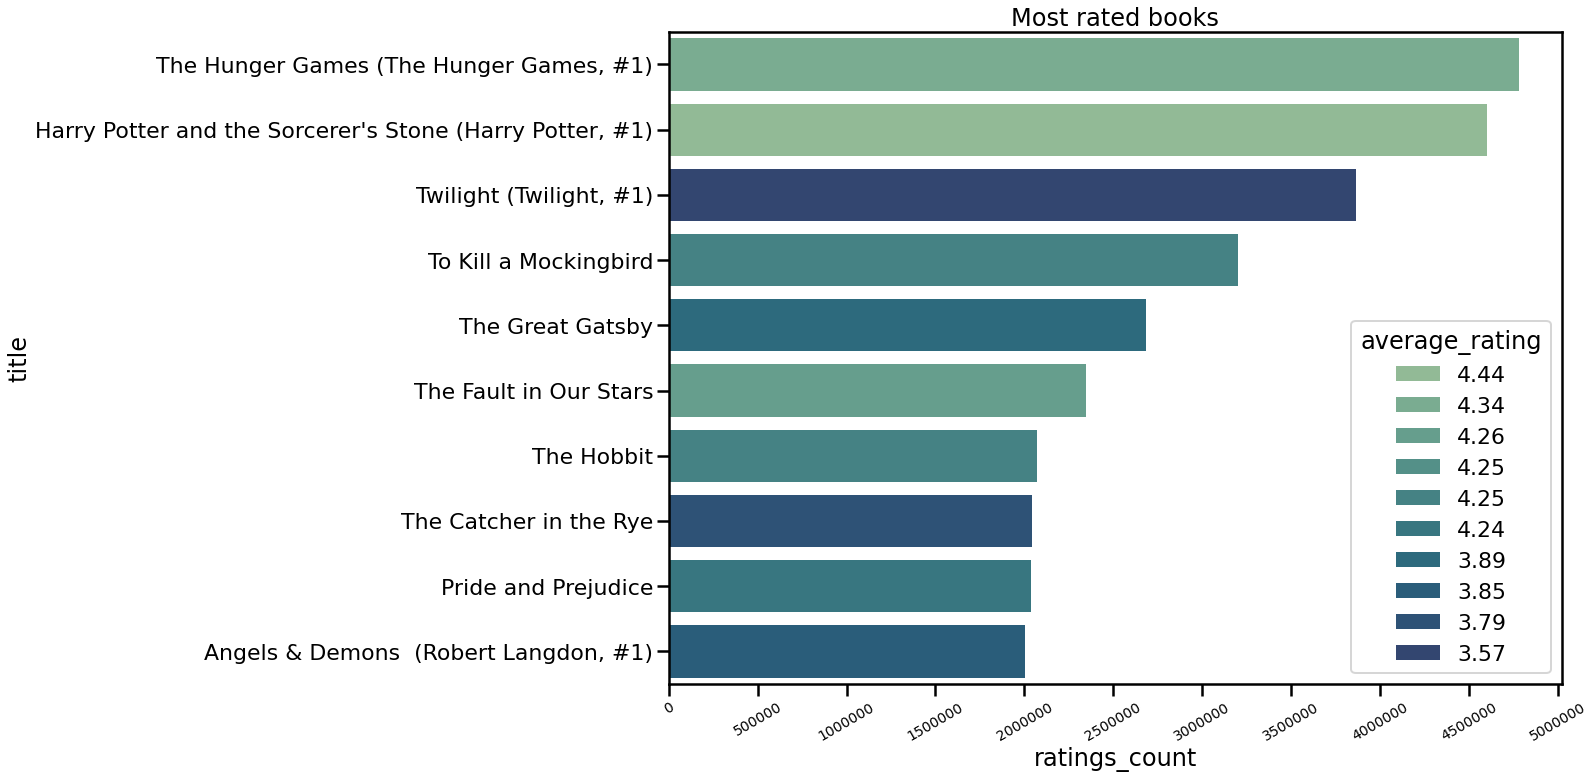

In [25]:
# Make graph showing the most rated books, and their ratings by color
sns.set_context('poster')
plt.figure(figsize=(16,12))
plt.ticklabel_format(style='plain')

hue_order = ratings_count['average_rating'].sort_values(ascending=False)
palette = sns.color_palette("crest", n_colors=10)
x_ticks=np.arange(0, 5500000, 500000)

ratings_plot = sns.barplot(x=ratings_count['ratings_count'], y=ratings_count['title'], hue=ratings_count['average_rating'],
            hue_order=hue_order, palette=palette, dodge=False)

plt.title('Most rated books')
plt.xticks(x_ticks, fontsize=14, rotation=30); # The semicolon supresses output

Here we can see The first entries tend to have the most ratings in a series, (e.g. Hunger games, Harry Potter, Twilight).

Otherwise these books cultural phenoms and/or part of a series.  

### Book ratings over time

Here I want to look at two things; a given year's average rating for all books, and a specific author's book rating over time. 

In [26]:
yearly = books.groupby('original_publication_year')
yearly_avg = yearly.average_rating.mean()

In [27]:
yearly_avg

original_publication_year
-1750.0    3.630000
-762.0     4.030000
-750.0     4.005000
-720.0     3.730000
-560.0     4.050000
             ...   
 2013.0    4.012297
 2014.0    3.985378
 2015.0    3.954641
 2016.0    4.027576
 2017.0    4.100909
Name: average_rating, Length: 293, dtype: float64

<AxesSubplot:xlabel='original_publication_year', ylabel='average_rating'>

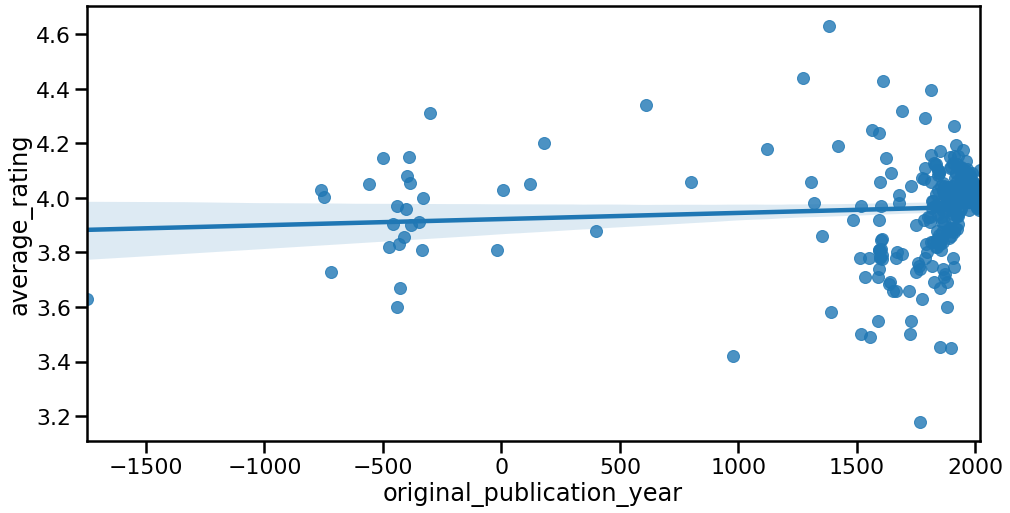

In [28]:
# a given year's average rating for all books, point plot
sns.set_context('poster')
plt.figure(figsize=(16,8))
plt.ticklabel_format(style='plain')
sns.regplot(x=yearly_avg.index, y=yearly_avg)

In [29]:
first_year = min(yearly_avg.index)
last_year = max(yearly_avg.index)
range_years = last_year - first_year
print(first_year, last_year, range_years)

-1750.0 2017.0 3767.0


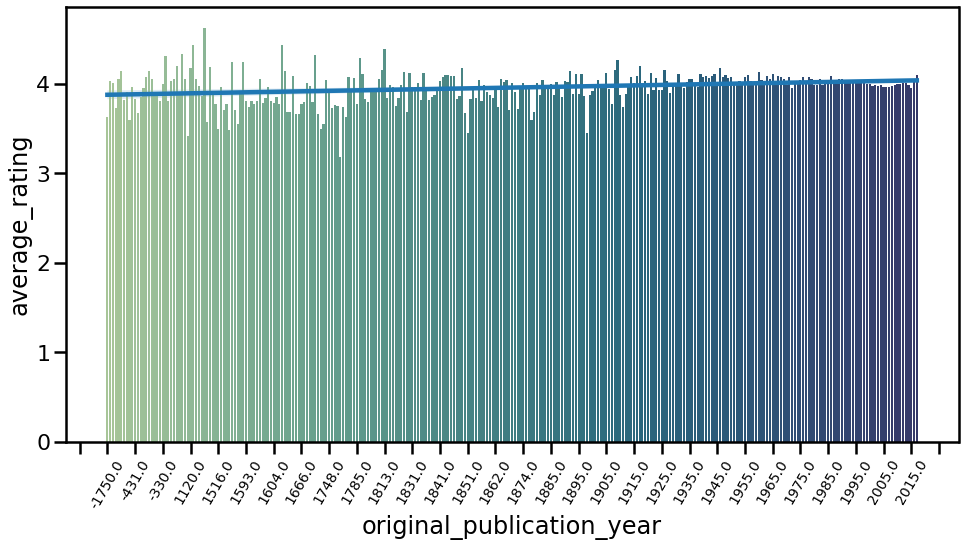

In [30]:
# a given year's average rating for all books; bar plot
sns.set_context('poster')
plt.figure(figsize=(16,8))
plt.ticklabel_format(style='plain')

hue_order = ratings_count['average_rating'].sort_values(ascending=False)
palette = sns.color_palette("crest", n_colors=len(yearly_avg.index)) #n_colors=10
# x_ticks=np.arange(first_year, last_year, range_years/25.0)


yearly_ratings_plot = sns.barplot(x=yearly_avg.index, y=yearly_avg, palette=palette)

sns.regplot(x=np.arange(0,len(yearly_avg)), y=yearly_avg, scatter=False, ax=yearly_ratings_plot)

yearly_ratings_plot.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(fontsize = 14, rotation = 60);

There is more variation in the early year than later years. The trend line is increasing, but the best rated old book is better than the best rated new book. 

### Author ratings over time

In [31]:
# specific author's book rating over time
# This one will include gaps where the author did not publish books
def author_ratings_gaps(dataframe, author):
    author_df = dataframe[dataframe['authors']==author]
    author_yearly = author_df.groupby('original_publication_year')['average_rating'].agg(['mean'])
    
    print(author_yearly.columns)
    plt.figure(figsize=(16,8))
    plt.ticklabel_format(style='plain')
    
    all_years=np.arange(min(author_yearly.index), max(author_yearly.index)+1, 1)
    
    # I want gaps for each year there isn't a book published, so I will add those rows with 0 values
    for year in all_years: 
        if year not in author_yearly.index: 
            author_yearly.loc[year] = 0

    author_yearly=author_yearly.sort_index()
    
    palette = sns.color_palette("crest", n_colors=len(author_yearly.index))
    
    
    yearly_ratings_plot = sns.barplot(x=author_yearly.index, y=author_yearly['mean'], palette=palette)
    
    # plot regplot with numbers 0,..,len(a) as x value
    # sns.regplot(x=np.arange(0,len(author_yearly)), y=author_yearly['mean'], ax=yearly_ratings_plot)
    # sns.despine(offset=10, trim=False)

    plt.xticks(fontsize=14, rotation=60)
    plt.ylabel("Average rating")
    plt.xlabel("Original year of publication")
    plt.title("{} book ratings over time".format(author))

    return yearly_ratings_plot

In [32]:
# specific author's book rating over time
# This function doesn't show gaps, but does overlay a trend line

def author_ratings_trend(dataframe, author):
    author_df = dataframe[dataframe['authors']==author]
    author_yearly = author_df.groupby('original_publication_year')['average_rating'].agg(['mean'])
    
    print(author_yearly.columns)
    plt.figure(figsize=(16,8))
    plt.ticklabel_format(style='plain')
    
    all_years=np.arange(min(author_yearly.index), max(author_yearly.index)+1, 1)
    
    # I want gaps for each year there isn't a book published, so I will add those rows with 0 values
#     for year in all_years: 
#         if year not in author_yearly.index: 
#             author_yearly.loc[year] = 0

    author_yearly=author_yearly.sort_index()
    
    palette = sns.color_palette("crest", n_colors=len(author_yearly.index))
    
    
    yearly_ratings_plot = sns.barplot(x=author_yearly.index, y=author_yearly['mean'], palette=palette)
    
    # plot regplot with numbers 0,..,len(a) as x value
    sns.regplot(x=np.arange(0,len(author_yearly)), y=author_yearly['mean'], scatter=False, ax=yearly_ratings_plot)

    plt.xticks(fontsize=14, rotation=60)
    plt.ylabel("Average rating")
    plt.xlabel("Original year of publication")
    plt.title("{} book ratings over time".format(author))
    
    return yearly_ratings_plot

In [33]:
# Who are the top publishing authors? 
books['authors'].value_counts().head(10)

Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
J.D. Robb          33
John Grisham       33
Name: authors, dtype: int64

Index(['mean'], dtype='object')
Index(['mean'], dtype='object')


<AxesSubplot:title={'center':'Stephen King book ratings over time'}, xlabel='Original year of publication', ylabel='Average rating'>

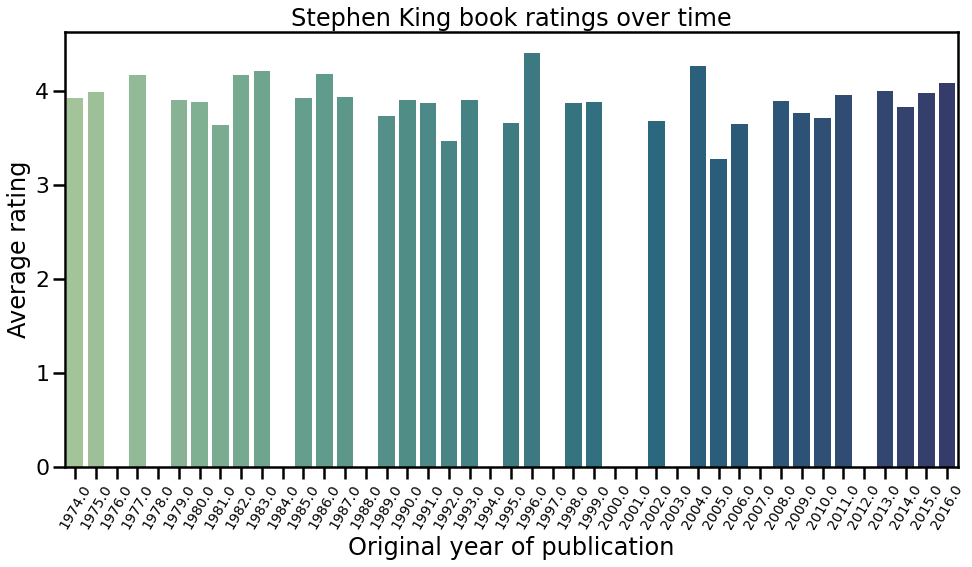

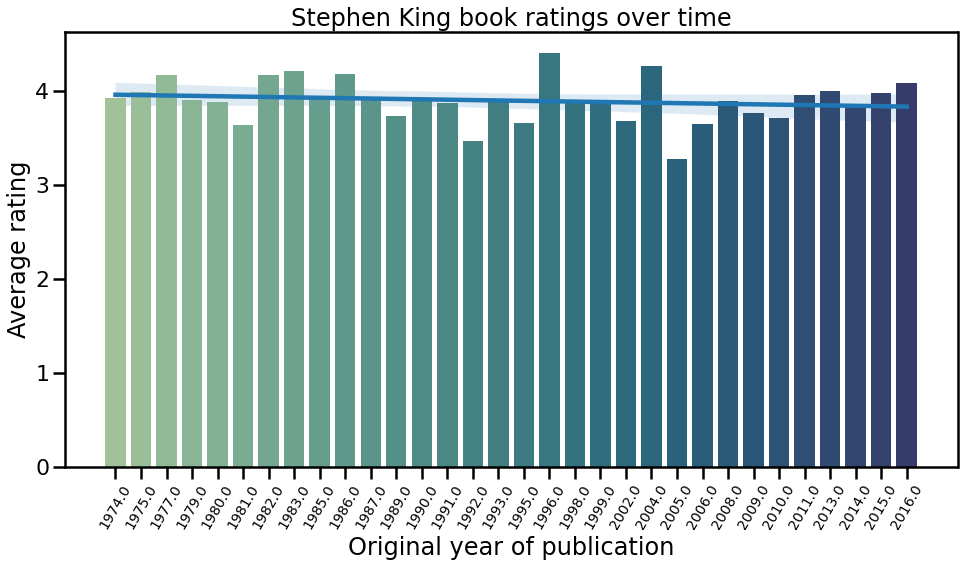

In [34]:
author_ratings_gaps(books, 'Stephen King')
author_ratings_trend(books, 'Stephen King')

Index(['mean'], dtype='object')
Index(['mean'], dtype='object')


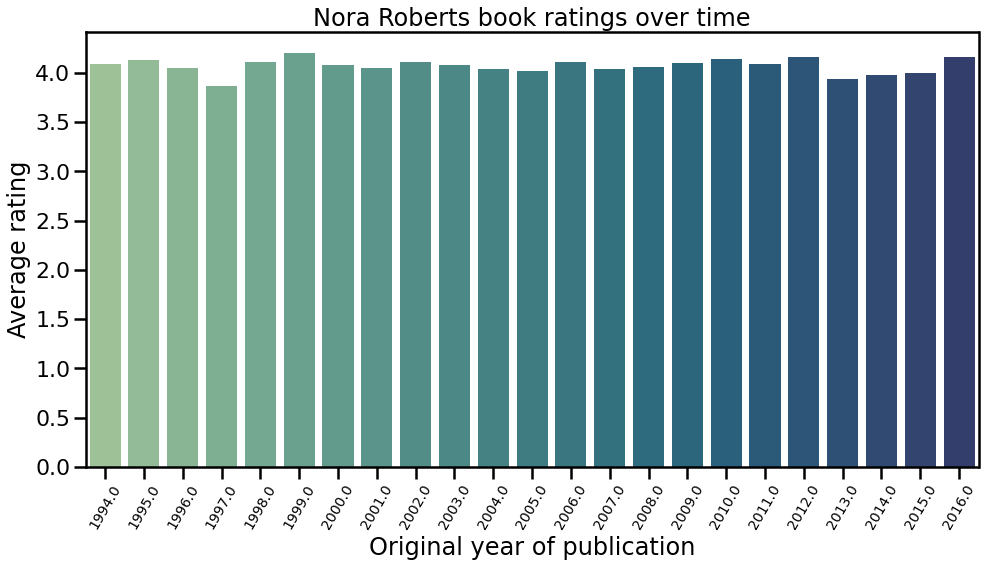

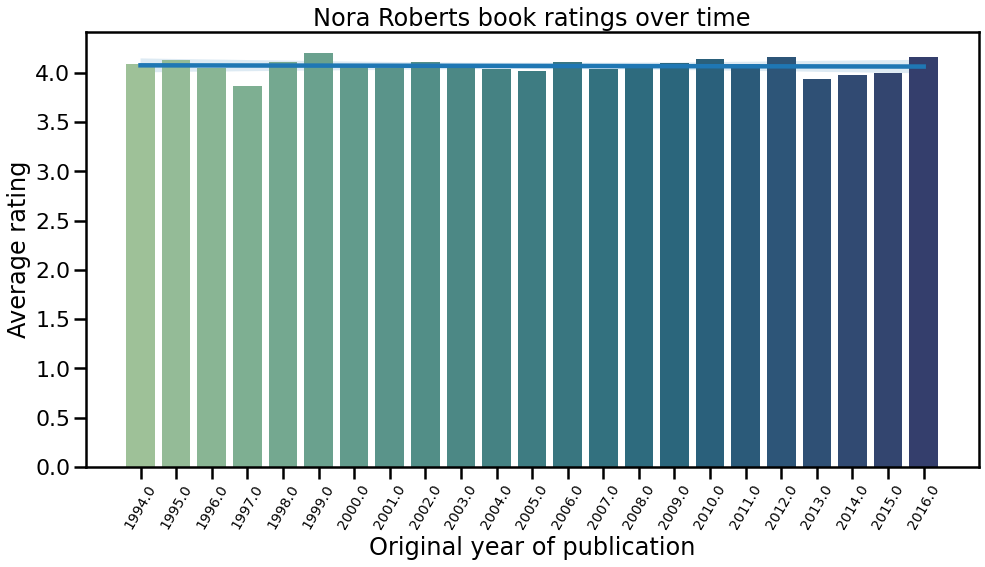

In [35]:
plot_gaps = author_ratings_gaps(books, 'Nora Roberts')
plot_trend = author_ratings_trend(books, 'Nora Roberts')

Index(['mean'], dtype='object')
Index(['mean'], dtype='object')


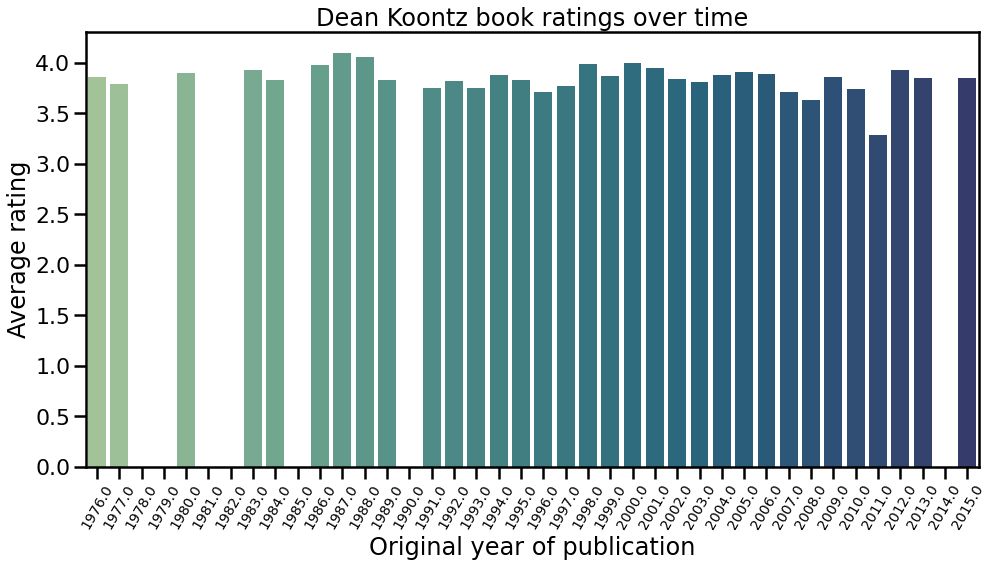

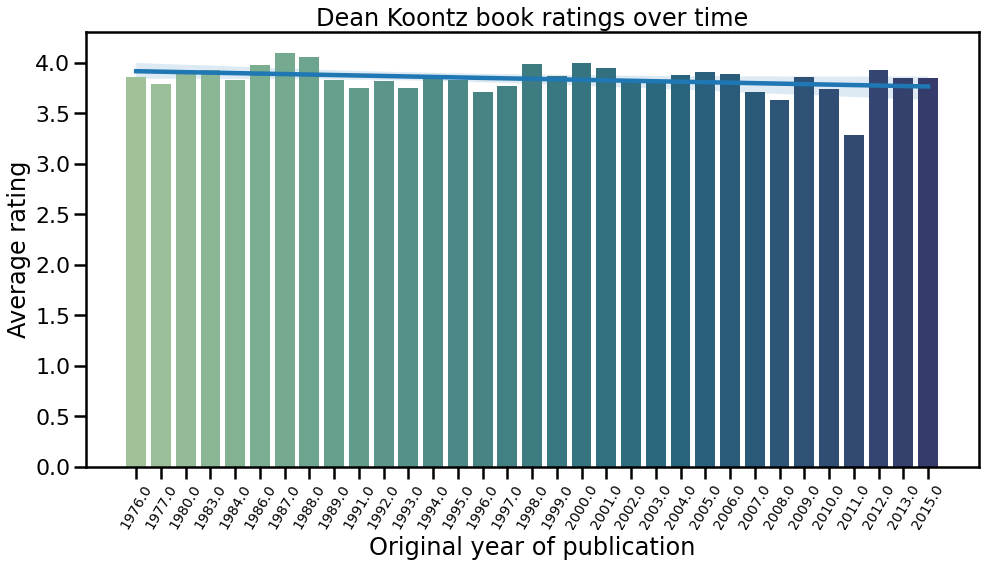

In [36]:
plot_gaps = author_ratings_gaps(books, 'Dean Koontz')
plot_trend = author_ratings_trend(books, 'Dean Koontz')

Index(['mean'], dtype='object')
Index(['mean'], dtype='object')


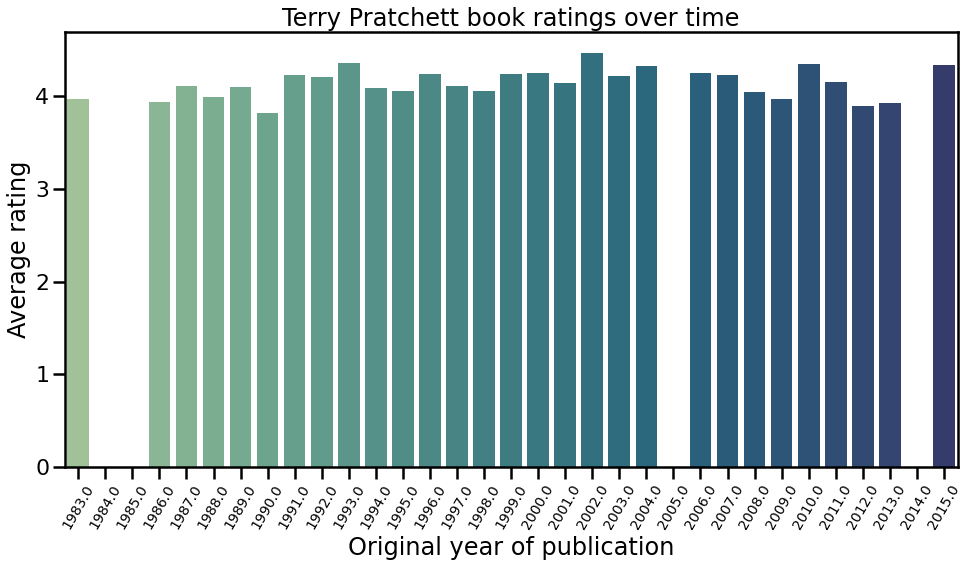

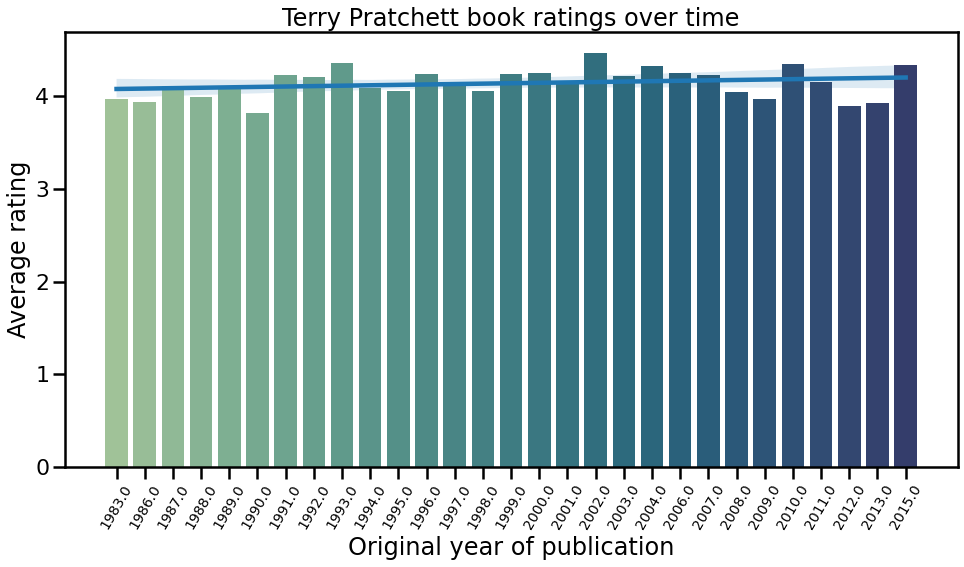

In [37]:
plot_gaps = author_ratings_gaps(books, 'Terry Pratchett')
plot_trend = author_ratings_trend(books, 'Terry Pratchett')

### Who are the highest rated authors? 

Text(0, 0.5, 'Authors')

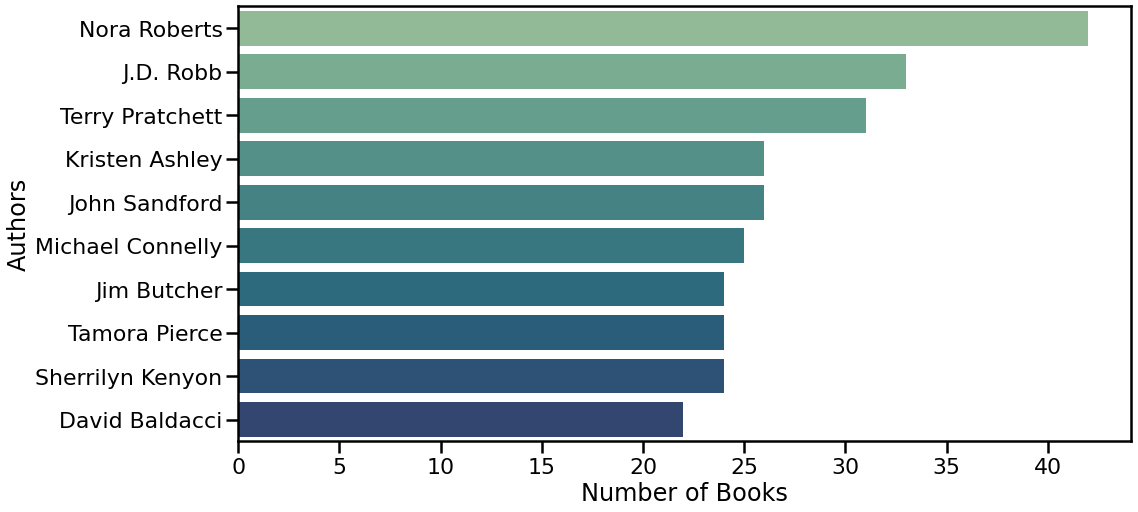

In [38]:
# Take only books with an average rating above 4 stars
high_rated_author = books[books['average_rating']>4]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')

plt.figure(figsize=(16,8))
palette = sns.color_palette("crest", n_colors=len(high_rated_author.index))

ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette=palette)

ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")

From this we can see that Nora Robers has 42 rating above 4! All of these authors have over 20 books with ratings above 4. Impressive!

### What's the rating distribution for all the books? 

In [39]:
books.average_rating.isna().sum()

0

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

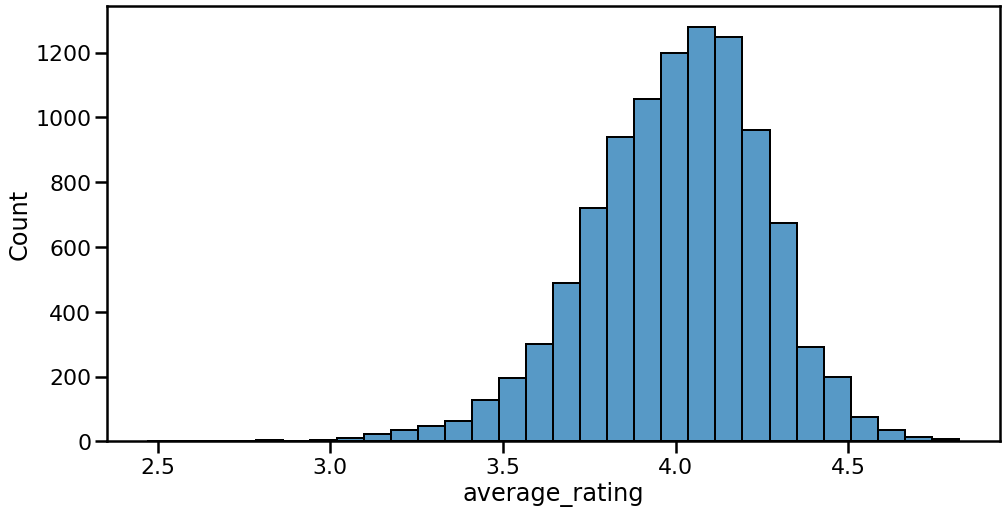

In [40]:
plt.figure(figsize=(16,8))
sns.histplot(x='average_rating', data=books, bins=30)

From this we can see that the vast majority of ratings are between 3 and 4.5. A score near 5 or less than 3 is rare. 

### Is there any relationship between features? 

<AxesSubplot:>

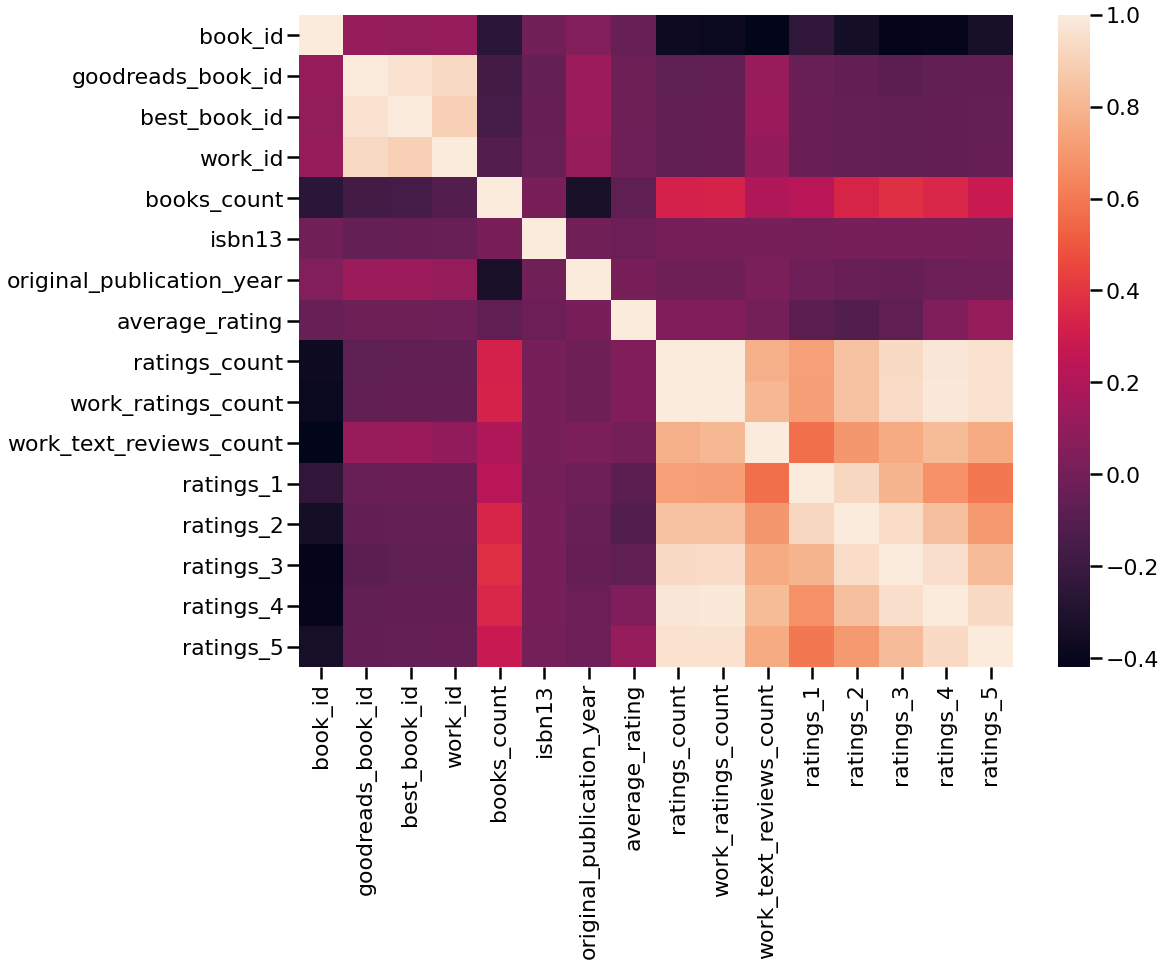

In [41]:
plt.figure(figsize=(16,12))
sns.heatmap(books.corr())

Initially, it doesn't look like there is any correlation between features other than the amount of reviews. 

I suspected average rating and the count of ratings or text reviews to correlate, but they do not. The only correlation I see is between the number of ratings and the number of text reviews, which makes sense. 

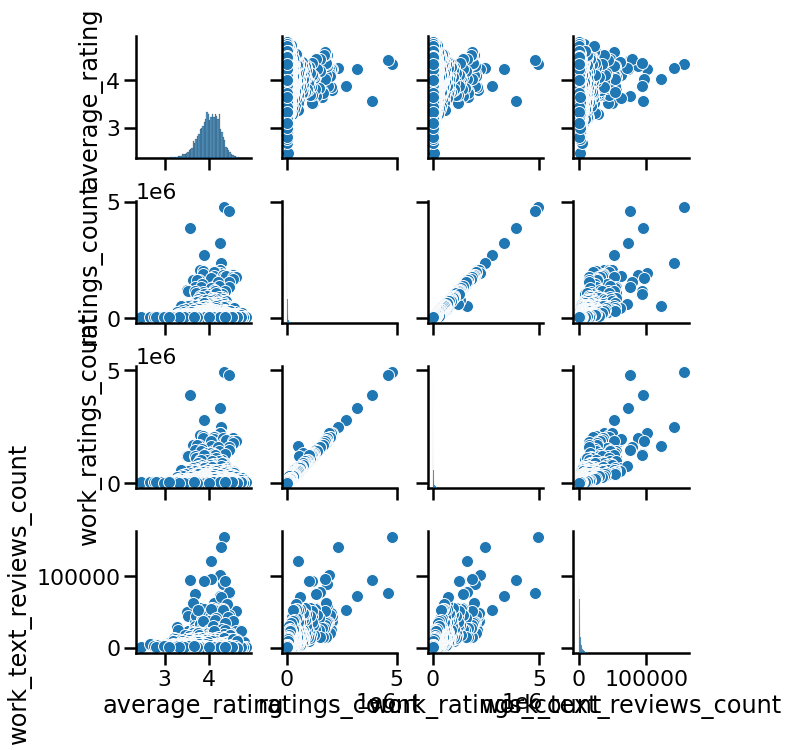

In [42]:
sns.pairplot(books[['average_rating','ratings_count','work_ratings_count','work_text_reviews_count']])

Here we see the those correlations in another format. Is it significant? 

In [43]:
from scipy.stats import chi2_contingency
from itertools import combinations

ratings_list = ['average_rating','ratings_count','work_ratings_count','work_text_reviews_count']
ratings_pairs = list(combinations(ratings_list, 2))

for item1, item2 in ratings_pairs: 
    contigency= pd.crosstab(books[item1], books[item2]) 
    # Chi-square test of independence. 
    c, p, dof, expected = chi2_contingency(contigency) 
    # Print the p-value
    print("{}, {} chi^2: {:.4f} p: {:.4f}".format(item1, item2, c, p))

average_rating, ratings_count chi^2: 1635598.2619 p: 1.0000
average_rating, work_ratings_count chi^2: 1658010.7539 p: 0.2057
average_rating, work_text_reviews_count chi^2: 862091.7298 p: 0.0000
ratings_count, work_ratings_count chi^2: 81943000.0000 p: 0.0000
ratings_count, work_text_reviews_count chi^2: 42313719.6128 p: 0.0000
work_ratings_count, work_text_reviews_count chi^2: 42585770.6530 p: 0.0000


The statistically significant corrleations are: 
* average_rating & work_text_reviews_count
* ratings_count & work_ratings_count
* ratings_count & work_text_reviews_count
* work_ratings_count & work_text_reviews_count

The correlations here make sense and can be summarized "the more liked something is, the more likely people are too rate it." 
This can be seen in the average rating distribution too

### Tags by popularity counts

In [44]:
# What is the most common tag? 
tag_df = book_tags.merge(tags, how='left', on='tag_id')
tag_df.groupby('tag_id')# .sort_values(by='count', ascending=False)[:10]
tag_df.head(10)

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult
5,1,11743,9954,fiction
6,1,14017,7169,harry-potter
7,1,5207,6221,books-i-own
8,1,22743,4974,owned
9,1,32989,4364,ya


Text(31.19999999999999, 0.5, 'Tag Name')

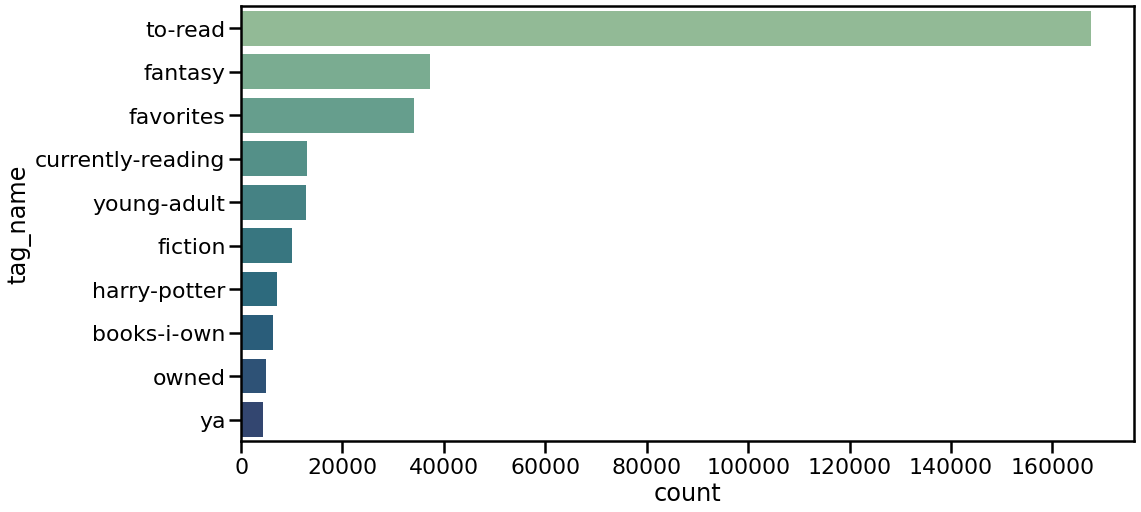

In [45]:
# Take only books with an average rating above 4 stars
high_rated_author = books[books['average_rating']>4]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')

plt.figure(figsize=(16,8))
palette = sns.color_palette("crest", n_colors=len(tag_df[:10].index))

sns.barplot(x='count', y='tag_name', data=tag_df[:10], palette=palette)

ax.set_xlabel("Number of books with tag")
ax.set_ylabel("Tag Name")

These tags make sense. Some are redundant, like the 'young-adult' and 'ya' combo or the 'owned' and 'books-i-own' combo.  

### What books are in most 'to read' shelves? 

In [46]:
to_read.shape

(912705, 2)

In [47]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [48]:
to_read_counts = pd.DataFrame(to_read['book_id'].value_counts())
to_read_counts = to_read_counts.rename(columns={'book_id':'to_read_count'})
to_read_counts.index.name ="book_id"
to_read_counts.reset_index(inplace=True)
to_read_counts.head()

,book_id,to_read_count
0,47,2772
1,143,1967
2,113,1840
3,13,1812
4,11,1767


In [49]:
books=books.merge(to_read_counts, on='book_id')

Text(31.19999999999999, 0.5, 'Tag Name')

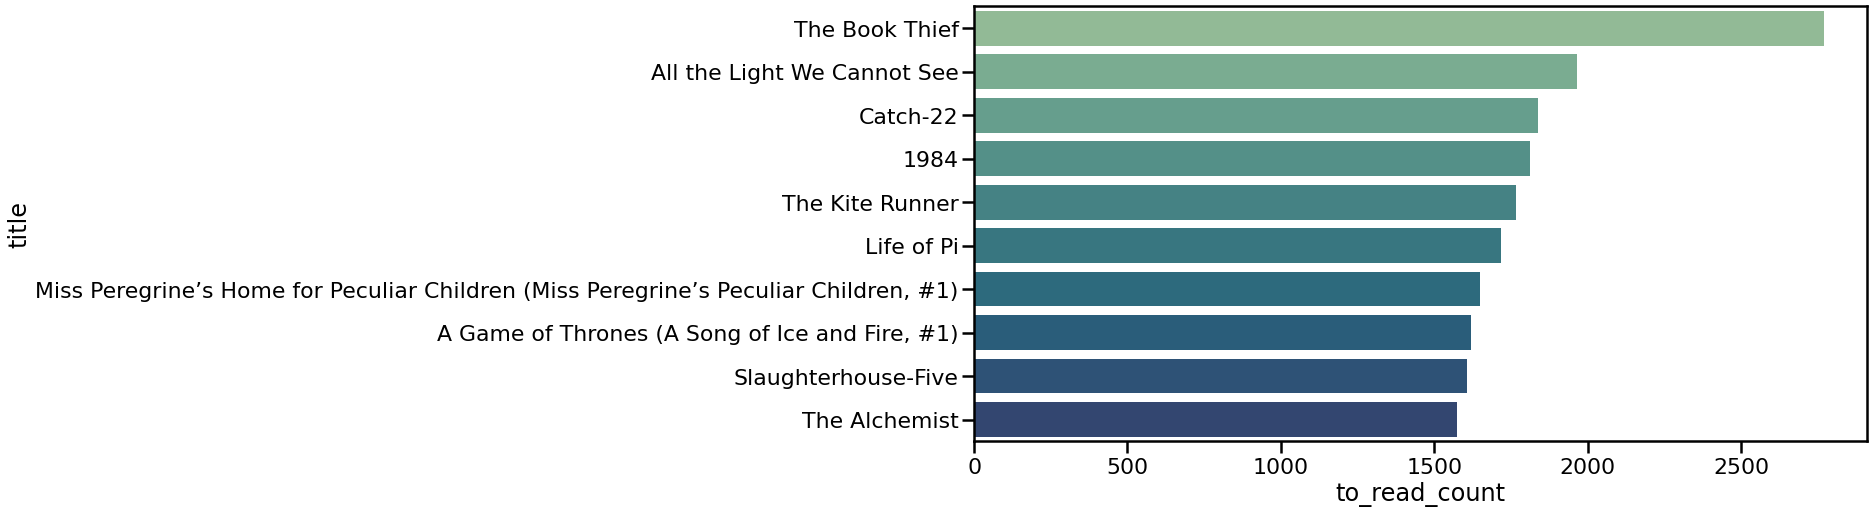

In [50]:
top_to_read = books.sort_values(by='to_read_count', ascending=False)[:10]

plt.figure(figsize=(16,8))
palette = sns.color_palette("crest", n_colors=len(top_to_read.index))

sns.barplot(x='to_read_count', y='title', data=top_to_read, palette=palette)

ax.set_xlabel("Number of books with tag")
ax.set_ylabel("Tag Name")